Reminder, when running this example I need to open cmd line for miniconda since that's where I installed pymatgen module. From cmd line the following command "conda activate my_pymatgen" will open the environment followed by "Jupyter Notebook" to open the Jupyter platform.

In [1]:
#Sparks_API = 'XXXXX' #put your API here

In [1]:
import pandas as pd
from pymatgen.ext.matproj import MPRester
import os

filename = r'G:\My Drive\teaching\5540-6640 Materials Informatics\old_apikey.txt'

def get_file_contents(filename):
    try:
        with open(filename, 'r') as f:
            # It's assumed our file contains a single line,
            # with our API key
            return f.read().strip()
    except FileNotFoundError:
        print("'%s' file not found" % filename)


Sparks_API = get_file_contents(filename)

In [2]:
import pymatgen.core as mg
si = mg.Element("Si")
print('Silicon has atomic mass of:', si.atomic_mass)

Silicon has atomic mass of: 28.0855 amu


The API for Materials Project recently (2022) was updated. You can read about the differences between new and old with API Key and install instructions for each.
https://docs.materialsproject.org/downloading-data/differences-between-new-and-legacy-api

For this class, let's use the new API which you can read about here https://api.materialsproject.org/docs

To install, in miniconda in your My_Pymatgen environment run the command 'pip install mp-api'

First, I had to update pydantic with the following code 'pip install pydantic==2.0'



In [3]:
#this works with the old legacy MPRester
from pymatgen.ext.matproj import MPRester

with MPRester(Sparks_API) as mpr:
    list_ids = mpr.get_materials_ids("TaC")
    print('All compounds in the Ta-C system are: ', mpr.get_materials_ids('Ta-C'))

c:\Users\taylo\miniconda3\envs\MyPymatgen\lib\site-packages\pymatgen\ext\matproj_legacy.py:164: UserWarning: You are using the legacy MPRester. This version of the MPRester will no longer be updated. To access the latest data with the new MPRester, obtain a new API key from https://materialsproject.org/api and consult the docs at https://docs.materialsproject.org/ for more information.
  warnings.warn(


All compounds in the Ta-C system are:  ['mp-611448', 'mp-1097832', 'mp-1205283', 'mp-24', 'mp-1078845', 'mp-1244913', 'mp-1008374', 'mp-579909', 'mp-1181996', 'mp-1194362', 'mp-1188817', 'mp-1182684', 'mp-1197903', 'mp-568286', 'mp-683919', 'mp-1008395', 'mp-569416', 'mp-568806', 'mp-606949', 'mp-611426', 'mp-1147718', 'mp-570002', 'mp-616440', 'mp-1018088', 'mp-1040425', 'mp-937760', 'mp-990448', 'mp-1096869', 'mp-568028', 'mp-66', 'mp-997182', 'mp-1080826', 'mp-1203645', 'mp-1182029', 'mp-998866', 'mp-47', 'mp-630227', 'mp-1205417', 'mp-1244964', 'mp-569517', 'mp-1095534', 'mp-1196583', 'mp-680372', 'mp-169', 'mp-624889', 'mp-1245190', 'mp-667273', 'mp-568363', 'mp-1056957', 'mp-569304', 'mp-568410', 'mp-569567', 'mp-48', 'mp-1095633', 'mp-632329', 'mp-990424', 'mp-1190171', 'mp-1192619', 'mp-1009835', 'mp-1025192', 'mp-1009832', 'mp-1218120', 'mp-1218000', 'mp-1086', 'mp-7088', 'mp-1009817', 'mp-1187218', 'mp-6986', 'mp-569794', 'mp-42', 'mp-1076923', 'mp-50', 'mp-697196', 'mp-12177

Or we can pull data from a specific materials project id

In [4]:
for i_d in list_ids:
    with MPRester(Sparks_API) as mpr:
        structure = mpr.get_structure_by_material_id(i_d)
        print(structure)


with MPRester(Sparks_API) as mpr:
    structure = mpr.get_structure_by_material_id('mp-1086')
    print(structure)
    cohesive_energy = mpr.get_cohesive_energy('mp-1086')
    print(cohesive_energy)


Full Formula (Ta1 C1)
Reduced Formula: TaC
abc   :   2.797247   2.797247   2.797247
angles:  90.000000  90.000000  90.000000
pbc   :       True       True       True
Sites (2)
  #  SP      a    b    c    magmom
---  ----  ---  ---  ---  --------
  0  Ta    0    0    0       0.001
  1  C     0.5  0.5  0.5    -0.001
Full Formula (Ta1 C1)
Reduced Formula: TaC
abc   :   3.421388   3.421388   3.421388
angles:  60.000000  60.000000  60.000000
pbc   :       True       True       True
Sites (2)
  #  SP       a     b     c    magmom
---  ----  ----  ----  ----  --------
  0  Ta    0     0     0            0
  1  C     0.25  0.25  0.25        -0
Full Formula (Ta1 C1)
Reduced Formula: TaC
abc   :   3.169306   3.169306   3.169306
angles:  60.000000  60.000000  60.000000
pbc   :       True       True       True
Sites (2)
  #  SP      a    b    c    magmom
---  ----  ---  ---  ---  --------
  0  Ta    0    0    0          -0
  1  C     0.5  0.5  0.5         0
Full Formula (Ta1 C1)
Reduced Formula: T

We can search for a materials project entry using a cif card

In [5]:
import os
mpr = MPRester(Sparks_API)
ciffile = os.path.join('9008565.cif')
data1 = mpr.find_structure(ciffile)
print(data1)

c:\Users\taylo\miniconda3\envs\MyPymatgen\lib\site-packages\pymatgen\ext\matproj_legacy.py:164: UserWarning: You are using the legacy MPRester. This version of the MPRester will no longer be updated. To access the latest data with the new MPRester, obtain a new API key from https://materialsproject.org/api and consult the docs at https://docs.materialsproject.org/ for more information.
  warnings.warn(


['mp-149']


How do we do queries though? What if we want to find all carbides having either Ta, Nb, or W?
We need to use the MPRester.query method!
This uses MongoDB's query syntax  --> mpr.query(criteria, properties)

In [7]:
mpr = MPRester(Sparks_API)
#mpr.query('SiO2',['material_id','density'])
#mpr.query('**O3',['pretty_formula','material_id'])
mpr.query({'chemsys':'O-Si'},['material_id'])

[{'material_id': 'mp-557591'},
 {'material_id': 'mp-557653'},
 {'material_id': 'mp-639733'},
 {'material_id': 'mp-1249090'},
 {'material_id': 'mp-554151'},
 {'material_id': 'mp-560809'},
 {'material_id': 'mp-600068'},
 {'material_id': 'mp-560973'},
 {'material_id': 'mp-1204057'},
 {'material_id': 'mp-639478'},
 {'material_id': 'mp-554267'},
 {'material_id': 'mp-1256499'},
 {'material_id': 'mp-559273'},
 {'material_id': 'mp-600045'},
 {'material_id': 'mp-600054'},
 {'material_id': 'mp-600063'},
 {'material_id': 'mp-667368'},
 {'material_id': 'mp-6930'},
 {'material_id': 'mp-559550'},
 {'material_id': 'mp-562490'},
 {'material_id': 'mp-639705'},
 {'material_id': 'mp-1194828'},
 {'material_id': 'mp-559605'},
 {'material_id': 'mp-558947'},
 {'material_id': 'mp-600051'},
 {'material_id': 'mp-557873'},
 {'material_id': 'mp-561291'},
 {'material_id': 'mp-667383'},
 {'material_id': 'mp-554089'},
 {'material_id': 'mp-555823'},
 {'material_id': 'mp-600018'},
 {'material_id': 'mp-600026'},
 {'mat

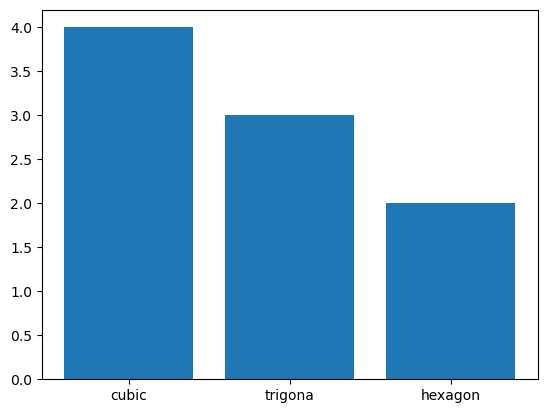

In [8]:
#example from John Dagdelen 2019 MP Workshop https://youtu.be/dsDOa_fgE7A
import matplotlib.pyplot as plt
%matplotlib inline
with MPRester(Sparks_API) as mpr:
    entries = mpr.query('Ta-C',['material_id','spacegroup.crystal_system'])
    systems = [entry['spacegroup.crystal_system'] for entry in entries]
    counts = {}
    
    for system in systems:
        if system in counts:
            counts[system] += 1
        else:
            counts[system] = 1    
    plt.bar(range(len(counts)), counts.values())
    plt.xticks(range(len(counts)), [key[0:7] for key in counts.keys()])
    

In [9]:
#example from Wenhao Sun https://wenhaosun.github.io/docs/MSE593/
#from pymatgen.analysis.phase_diagram import PhaseDiagram, PDPlotter
#import math
#This initializes the REST adaptor. Put your own API key in.
#mpr = MPRester(Sparks_API)
 
#Entries are the basic unit for thermodynamic and other analyses in pymatgen.
#This gets all entries belonging to the Ca-O system.
#entries = mpr.get_entries_in_chemsys(['Ca', 'La', 'S'])

#With entries, you can do many sophisticated analyses, 
#like creating phase diagrams.
#pd = PhaseDiagram(entries)
#plotter = PDPlotter(pd)
#plotter.show()

In [10]:
#entries = mpr.get_entries_in_chemsys(['Mo', 'B', 'C'])

#With entries, you can do many sophisticated analyses, 
#like creating phase diagrams.
#pd = PhaseDiagram(entries)
#plotter = PDPlotter(pd)
#plotter.show()

In [11]:
#example from Wenhao Sun https://wenhaosun.github.io/docs/MSE593/
from pymatgen.ext.matproj import MPRester

mpr = MPRester(Sparks_API)

criteria = {'elements':{"$in":["Li", "Na", "K"], "$all": ["O"]}, #All compounds contain O, and must have Li or Na or K
			'nelements':3,
            'icsd_ids': {'$gte': 0},
            'e_above_hull': {'$lte': 0.01},
            'anonymous_formula': {"A": 1, "B": 1, "C": 3},
            "band_gap": {"$gt": 1}
            }

        # The properties and the criteria use MaterialsProject features 
        # You can see what is queryable from the MP API documentation: 
        # https://github.com/materialsproject/mapidoc/tree/master/materials
        
        # The criteria uses mongodb query language. See here 
        # for more details: https://docs.mongodb.com/manual/reference/operator/query/

props = ['structure', "material_id",'pretty_formula','e_above_hull',"band_gap","band_structure"]
entries = mpr.query(criteria=criteria, properties=props)

print(len(entries))

for e in entries:
    print(e['pretty_formula'])
    print(e['band_gap'])
    print(e)
    break

c:\Users\taylo\miniconda3\envs\MyPymatgen\lib\site-packages\pymatgen\ext\matproj_legacy.py:164: UserWarning: You are using the legacy MPRester. This version of the MPRester will no longer be updated. To access the latest data with the new MPRester, obtain a new API key from https://materialsproject.org/api and consult the docs at https://docs.materialsproject.org/ for more information.
  warnings.warn(


53
KPO3
5.0422
{'structure': Structure Summary
Lattice
    abc : 4.622368 10.532778 14.283612732012022
 angles : 78.68805047946931 90.0 90.0
 volume : 681.9080032992589
      A : 4.622368 0.0 0.0
      B : 0.0 10.532778 0.0
      C : 0.0 2.80174 14.006136
    pbc : True True True
PeriodicSite: K (1.29, 11.71, 9.396) [0.2791, 0.9333, 0.6708]
PeriodicSite: K (3.601, 3.026, 11.61) [0.7791, 0.06671, 0.8292]
PeriodicSite: K (3.332, 1.625, 4.61) [0.7209, 0.06671, 0.3292]
PeriodicSite: K (1.021, 10.31, 2.393) [0.2209, 0.9333, 0.1708]
PeriodicSite: K (3.403, 8.111, 8.841) [0.7361, 0.6021, 0.6313]
PeriodicSite: K (1.092, 6.625, 12.17) [0.2361, 0.3979, 0.8687]
PeriodicSite: K (1.22, 5.224, 5.165) [0.2639, 0.3979, 0.3687]
PeriodicSite: K (3.531, 6.71, 1.838) [0.7639, 0.6021, 0.1313]
PeriodicSite: P (3.677, 3.826, 7.779) [0.7956, 0.2155, 0.5554]
PeriodicSite: P (1.366, 10.91, 13.23) [0.2956, 0.7845, 0.9446]
PeriodicSite: P (0.9449, 9.509, 6.227) [0.2044, 0.7845, 0.4446]
PeriodicSite: P (3.256, 2.4

# Now you try it!

Let's find your favoreite structure in the Crystallographic Open Database, adn then use MPRester API to find all entries in the Materials Project having the same structure type


In [1]:
#hint! the .get_structure_by_material_id() method is useful here
#hint! the .get_space_group_info() method is useful here
#hint! the .get_entry_by_material_id() method is useful here
#hint! consider using a search criteria that enforces the same space group and the same anonymous formula

